In [1]:
# import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# load the data
final_df= pd.read_csv(Path('./Resources/joined_df.csv'))

In [3]:
# scale the data
data_scaler = StandardScaler()
final_df[['number_of_restaurants', 'number_of_diabetes_cases', 'number_of_obesity_cases', 'number_of_inactive_adults', 'number_of_smokers']] = data_scaler.fit_transform(final_df[['number_of_restaurants', 'number_of_diabetes_cases', 'number_of_obesity_cases', 'number_of_inactive_adults', 'number_of_smokers']])
final_df.head()

,state_name,state_population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,diabetes_per_capita,number_of_obesity_cases,number_of_inactive_adults,number_of_smokers
0,Alabama,4874486,-0.378901,0.056957,0.000049,0.108733,0.054837,0.085878,0.173879
1,Alaska,739700,-1.003010,-0.865391,0.000038,0.060649,-0.859317,-0.866384,-0.912765
2,Arizona,7044008,0.362412,0.003385,0.000070,0.071243,-0.032597,0.046176,-0.051486
3,Arkansas,3001345,-0.396481,-0.381447,0.000078,0.099761,-0.326564,-0.299687,-0.183844
4,California,39358497,4.074836,3.979447,0.000045,0.065888,3.806123,3.296327,3.349531


In [4]:
# convert to csv
final_df.to_csv(r'Resources/final_df.csv', index=False)

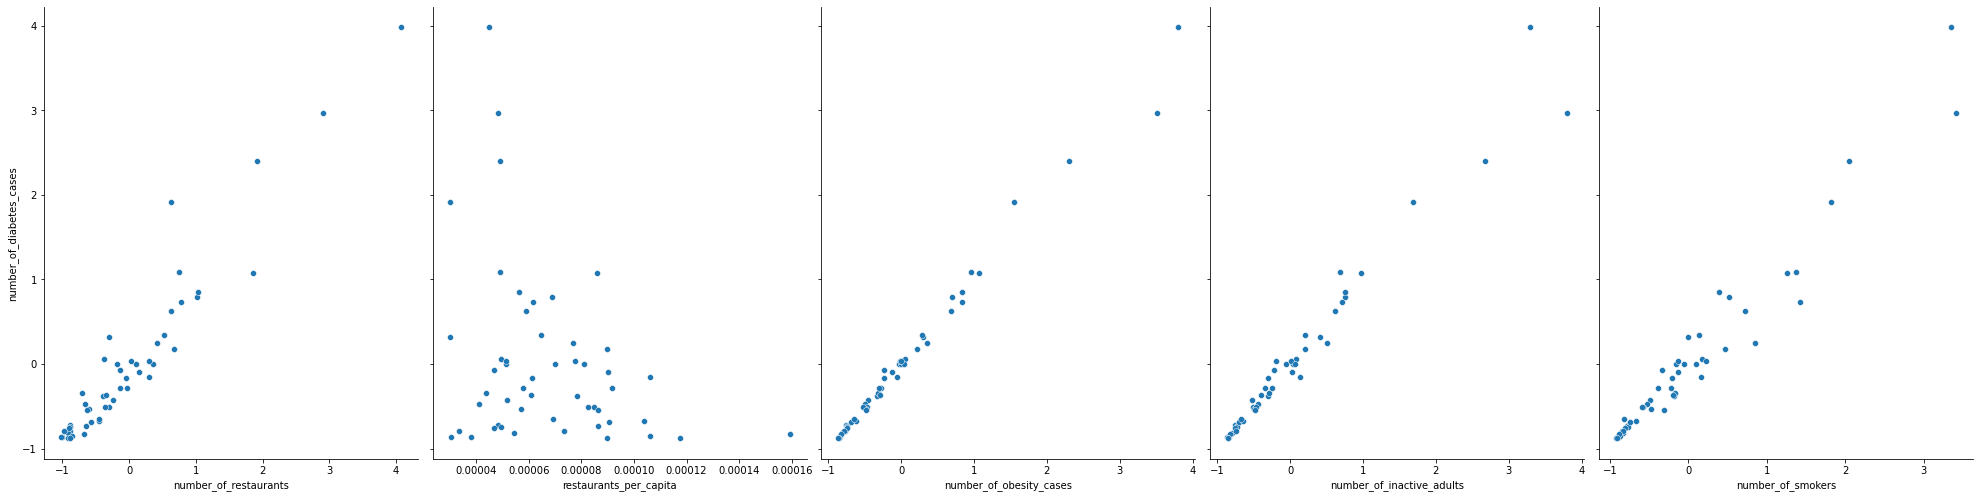

In [5]:
# visualize the relationship between the features and number of diabetes cases using scatterplots
sns.pairplot(final_df, x_vars=['number_of_restaurants','restaurants_per_capita', 'number_of_obesity_cases', 'number_of_inactive_adults', 'number_of_smokers'],
             y_vars='number_of_diabetes_cases', height=7, aspect=0.8)

In [6]:
#define the variables
features=['number_of_restaurants','restaurants_per_capita', 'number_of_obesity_cases', 'number_of_inactive_adults', 'number_of_smokers']
X = final_df[features].values.reshape(-1, len(features))
y = final_df['number_of_diabetes_cases'].values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# instantiate and fit
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate the model
mean_square = mean_squared_error(y_test, y_pred)
print(mean_square)

0.028039375468101042


In [7]:
# pair the feature names with the coefficients
list(zip(features, model.coef_))

[('number_of_restaurants', 0.14824322097426265),
 ('restaurants_per_capita', -1081.2926241598584),
 ('number_of_obesity_cases', 1.17396734994702),
 ('number_of_inactive_adults', -0.2594109175147423),
 ('number_of_smokers', -0.0921248979630036)]

In [8]:
#R-squared (i.e. accuracy score)
model.score(X, y)

0.9876587193050453

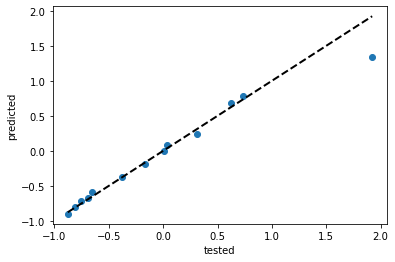

In [9]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('tested')
ax.set_ylabel('predicted')
plt.show()